In [86]:
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_blobs
# Generate synthetic data
np.random.seed(0)
centers = [[-5, 0], [5, 1.5]]
X, y = make_blobs(n_samples=2000, centers=centers, random_state=5)
transformation = [[0.5, 0.5], [-0.5, 1.5]]
X = np.dot(X, transformation)
print(X)

[[-2.19655439 -6.04817613]
 [ 0.81789766  4.8792503 ]
 [ 2.8314302   5.80299161]
 ...
 [-3.26670243 -2.62516778]
 [ 2.23050411  4.08324346]
 [ 0.81695873  4.89150137]]


In [87]:
# Sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Loss function - Log Loss (Binary Crossentropy)
def compute_loss(y, y_hat):
    m = len(y)
    return -np.sum(y * np.log(y_hat) + (1 - y) * np.log(1 - y_hat)) / m

# Gradient of the loss function
def compute_gradient(X, y, y_hat):
    m = len(y)
    return np.dot(X.T, (y_hat - y)) / m

# Initialize weights to zeros
weights = np.zeros((2, 1))
bias = np.zeros(1)
learning_rate = 0.01
iterations = 20
loss_history = []

# Reshape y to match (m, 1)
y = y.reshape(-1, 1)

# Main loop for batch gradient descent
for i in range(iterations):
    # Calculate the predictions
    z = np.dot(X, weights) + bias
    y_hat = sigmoid(z)

    # Calculate the loss
    loss = compute_loss(y, y_hat)
    loss_history.append(loss)  # store the loss

    # Calculate gradients
    dW = compute_gradient(X, y, y_hat)
    db = np.sum(y_hat - y) / len(y)

    # Update weights and bias
    weights -= learning_rate * dW
    bias -= learning_rate * db

    # Print the loss every 5 iterations

    print(f"Iteration {i+1}, Loss: {loss:.4f}")



Iteration 1, Loss: 0.6931
Iteration 2, Loss: 0.6499
Iteration 3, Loss: 0.6109
Iteration 4, Loss: 0.5756
Iteration 5, Loss: 0.5437
Iteration 6, Loss: 0.5148
Iteration 7, Loss: 0.4885
Iteration 8, Loss: 0.4646
Iteration 9, Loss: 0.4428
Iteration 10, Loss: 0.4228
Iteration 11, Loss: 0.4045
Iteration 12, Loss: 0.3877
Iteration 13, Loss: 0.3721
Iteration 14, Loss: 0.3578
Iteration 15, Loss: 0.3445
Iteration 16, Loss: 0.3321
Iteration 17, Loss: 0.3207
Iteration 18, Loss: 0.3100
Iteration 19, Loss: 0.3000
Iteration 20, Loss: 0.2906


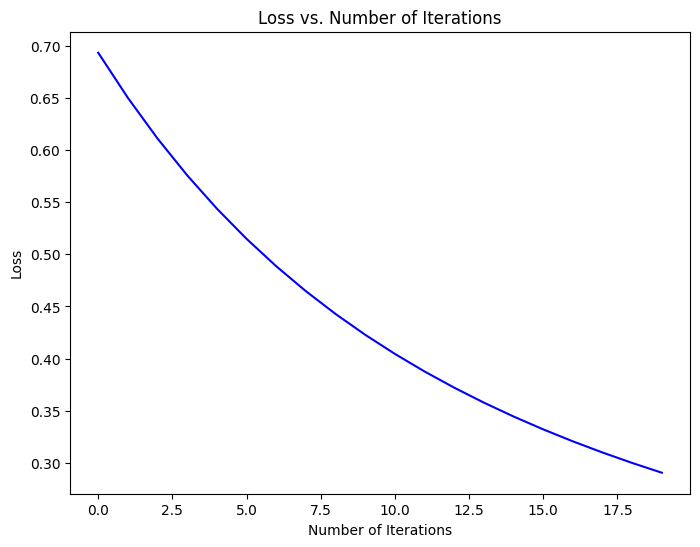

In [88]:
# Plot the loss over iterations
plt.figure(figsize=(8, 6))
plt.plot(range(iterations), loss_history, linestyle='-', color='b')
plt.title('Loss vs. Number of Iterations')
plt.xlabel('Number of Iterations')
plt.ylabel('Loss')

plt.show()

In [89]:
# Stochastic Gradient Descent
def sgd(X, y, learning_rate=0.01, epochs=20):
    # Initialize weights and bias to zeros
    weights = np.zeros((X.shape[1], 1))
    bias = np.zeros(1)

    sgd_history = []
    m = len(y)

    for epoch in range(epochs):
        for i in range(m):

            xi = X[i,:].reshape(-1, 1)
            yi = y[i]

            # Forward pass
            z = np.dot(xi.T, weights) + bias
            y_hat = sigmoid(z)

            # Compute gradient
            dw = np.dot(xi, (y_hat - yi))
            db = np.sum(y_hat - yi)

            # Update weights and bias
            weights -= learning_rate * dw
            bias -= learning_rate * db

        # Calculate loss for monitoring
        z = np.dot(X, weights) + bias
        y_hat = sigmoid(z)
        loss = compute_loss(y, y_hat)
        sgd_history.append(loss)

        print(f'Epoch {epoch+1}/{epochs}, Loss: {loss:.4f}')

    return weights, bias, sgd_history

# Reshape target variable to fit the model
y = y.reshape(-1, 1)

# Run SGD
weights, bias, sgd_history = sgd(X, y, learning_rate=0.01, epochs=20)




Epoch 1/20, Loss: 0.0068
Epoch 2/20, Loss: 0.0037
Epoch 3/20, Loss: 0.0026
Epoch 4/20, Loss: 0.0021
Epoch 5/20, Loss: 0.0017
Epoch 6/20, Loss: 0.0015
Epoch 7/20, Loss: 0.0013
Epoch 8/20, Loss: 0.0011
Epoch 9/20, Loss: 0.0010
Epoch 10/20, Loss: 0.0009
Epoch 11/20, Loss: 0.0009
Epoch 12/20, Loss: 0.0008
Epoch 13/20, Loss: 0.0008
Epoch 14/20, Loss: 0.0007
Epoch 15/20, Loss: 0.0007
Epoch 16/20, Loss: 0.0006
Epoch 17/20, Loss: 0.0006
Epoch 18/20, Loss: 0.0006
Epoch 19/20, Loss: 0.0005
Epoch 20/20, Loss: 0.0005


In [90]:
import numpy as np

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def compute_loss(y, y_pred):
    y_pred = np.clip(y_pred, 1e-10, 1 - 1e-10)
    loss = -(1 / len(y)) * np.sum(y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred))
    return loss

def newtons_method(X, y, iterations=20):
    weights = np.zeros(X.shape[1])  # Initialize weights with shape (n_features,)
    bias = 0
    losses = []
    w=[]

    for i in range(iterations):
        z = np.dot(X, weights) + bias
        y_pred = sigmoid(z)

        dW = np.dot(X.T, (y_pred - y)) / len(y)
        db = np.sum(y_pred - y) / len(y)

        # Diagonal matrix of predictions
        S = np.diag((y_pred * (1 - y_pred)).flatten())

        # Compute Hessian with shape (n_features, n_features)
        Hessian = np.dot(X.T, S.dot(X)) / len(y)

        # Add small value to diagonal for stability if Hessian is singular
        if np.linalg.det(Hessian) == 0:
            Hessian += np.eye(Hessian.shape[0]) * 0.01

        # Newton's method update
        dW_n = np.linalg.inv(Hessian).dot(dW)
        weights -= dW_n
        bias -= db

        # Compute loss
        loss = compute_loss(y, y_pred)
        losses.append(loss)

        print(f'Iteration{i+1}: weights: {weights}')

    return weights, bias, losses

# Generate synthetic data
from sklearn.datasets import make_blobs
np.random.seed(0)
centers = [[-5, 0], [5, 1.5]]
X, y = make_blobs(n_samples=2000, centers=centers, random_state=5)
transformation = [[0.5, 0.5], [-0.5, 1.5]]
X = np.dot(X, transformation)

# Run Newton's Method
weights_nm, bias_nm, losses_nm = newtons_method(X, y, 20)

for i in range(len(losses_nm)):
    print(f" loss : {losses_nm[i]}")
print(f"After 20 iterations: weights= {weights_nm} , bias = {bias_nm}")


Iteration1: weights: [0.55245408 0.20620372]
Iteration2: weights: [0.88928905 0.33407409]
Iteration3: weights: [1.21418791 0.45865511]
Iteration4: weights: [1.54548914 0.58581567]
Iteration5: weights: [1.89144327 0.71714509]
Iteration6: weights: [2.25892024 0.85283044]
Iteration7: weights: [2.65592236 0.99241663]
Iteration8: weights: [3.09253716 1.13538128]
Iteration9: weights: [3.58078619 1.28195604]
Iteration10: weights: [4.13317586 1.43404043]
Iteration11: weights: [4.76012015 1.59545239]
Iteration12: weights: [5.46727608 1.77075508]
Iteration13: weights: [6.25415317 1.96311346]
Iteration14: weights: [7.11454985 2.17283656]
Iteration15: weights: [8.03837874 2.397615  ]
Iteration16: weights: [9.0139377  2.63385792]
Iteration17: weights: [10.02973516  2.87799818]
Iteration18: weights: [11.07556367  3.12720039]
Iteration19: weights: [12.14298349  3.37951288]
Iteration20: weights: [13.22542352  3.63371974]
 loss : 0.6931471805599454
 loss : 0.14532911995033612
 loss : 0.0528048036006179

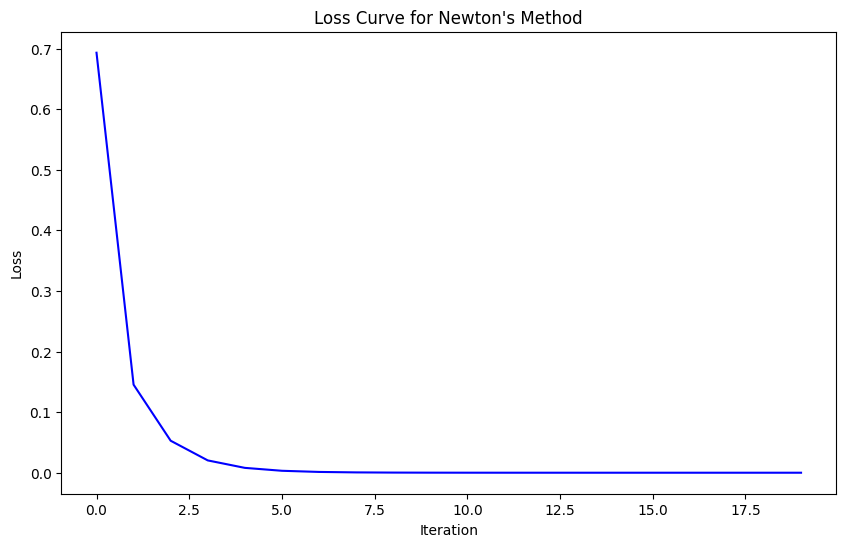

In [91]:

plt.figure(figsize=(10, 6))
plt.plot(losses_nm, linestyle='-', color='blue')
plt.title('Loss Curve for Newton\'s Method')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.show()

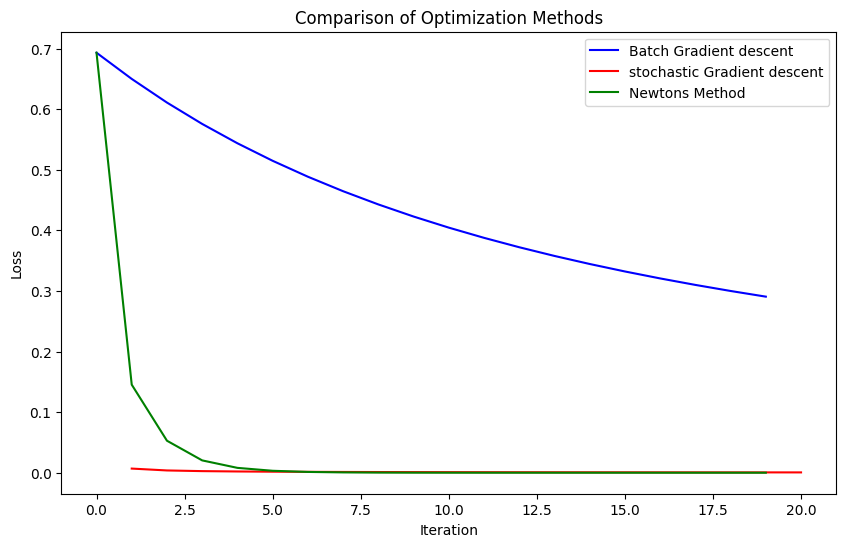

In [100]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(range(iterations), loss_history, linestyle='-', color='b',label='Batch Gradient descent')
plt.plot(range(1, len(sgd_history) + 1), sgd_history, linestyle='-', color='red',label='stochastic Gradient descent')
plt.plot(losses_nm, linestyle='-', color='green',label='Newtons Method')


plt.title('Comparison of Optimization Methods')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.legend()

plt.show()


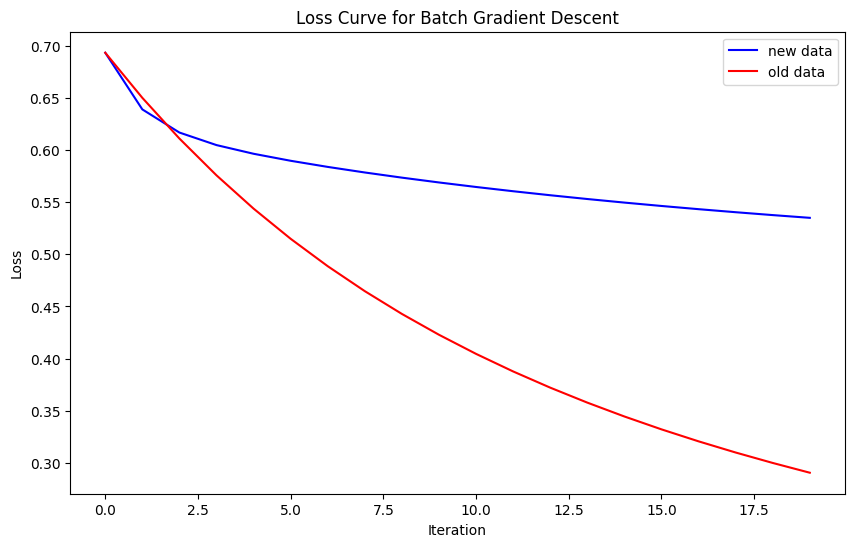

In [101]:

from sklearn.datasets import make_blobs

# Generate synthetic data
np.random.seed(0)
centers = [[3, 0], [5, 1.5]]
X, y = make_blobs(n_samples=2000, centers=centers, random_state=5)
transformation = [[0.5, 0.5], [-0.5, 1.5]]
X = np.dot(X, transformation)

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def compute_loss(y, y_pred):
    y_pred = np.clip(y_pred, 1e-10, 1 - 1e-10)
    loss = -(1 / len(y)) * np.sum(y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred))
    return loss

def batch_gradient_descent(X, y, learning_rate=0.1, iterations=0):
    weights = np.zeros(X.shape[1])  # Initialize weights with shape (n_features,)
    bias = 0
    losses = []

    for i in range(iterations):
        z = np.dot(X, weights) + bias
        y_pred = sigmoid(z)

        dW = np.dot(X.T, (y_pred - y)) / len(y)
        db = np.sum(y_pred - y) / len(y)

        # Update weights and bias
        weights -= learning_rate * dW
        bias -= learning_rate * db

        # Compute and store loss
        loss = compute_loss(y, y_pred)
        losses.append(loss)

    return weights, bias, losses

weights_bgd, bias_bgd, losses_bgd = batch_gradient_descent(X, y, learning_rate=0.1, iterations=20)

# Plotting the loss curve
plt.figure(figsize=(10, 6))
plt.plot(losses_bgd, linestyle='-', color='blue',label='new data')
plt.plot(range(iterations), loss_history, linestyle='-', color='red',label='old data')
plt.title('Loss Curve for Batch Gradient Descent')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.legend()
plt.show()
